In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Esercitazione 10 _ Bonato Angela

In questa esercitazione era richiesto di parallelizzare l'algoritmo genetico e applicarlo al problema del commesso viaggiatore considerando tutti i capoluoghi di provincia italiani. Usando la libreria *MPICH*, ho potuto adattare il GA scritto per l'esercitazione 9 (alzando le probabilità di crossover e mutazione per migliorarne l'efficienza) e farlo eseguire in parallelo a 6 degli 8 core di cui il mio pc dispone. Inizialmente ho semplicemente lasciato che ogni processo trovasse la sua soluzione ottimale per confrontare in un secondo momento i risultati ottenuti, poi ho fatto sì che dopo ogni $N_{migr}=150$ generazioni i processi potessero comunicare fra loro scambiandosi, a coppie scelte ogni volta randomicamente, il percorso migliore della popolazione corrente. 

Per parallelizzare il codice ho dovuto inizializzare il generatore di numeri casuali su ogni processo in maniera diversa, in modo da ottenere sequenze di numeri differenti. Per semplicità, ho definito tutte le variabili di inizializzazione sul processo con rank $r=0$ e poi le ho inviate sui vari processi usando le funzioni `MPI_Send()` e `MPI_Recv()`. Lo stesso ho fatto per passare a tutti i core il vettore inizializzato con le città lette da file, dopo aver creato un apposito `MPI_Datatype` e una specifica versione delle funzioni di comunicazione usate prima per gestire la classe personalizzata che ho definito per memorizzare le città. Per gestire le migrazioni ho innanzitutto usato la versione standard di `MPI_Send()` e `MPI_Recv()` per permettere a tutti i processi di conoscere gli accoppiamenti estratti (un vettore statico di `MPI_INT`). Dopodichè, ho ridefinito nuove specifiche versioni delle funzioni di invio e ricezione che scomponessero e ricomponessero in `MPI_INT` e `MPI_DOUBLE` i membri della classe personalizzata che ho utilizzato per gestire i percorsi. In questo modo la comunicazione è sempre stata correttamente gestita da funzioni bloccanti.

Secondo le osservazioni fatte durante la descrizione dell'esercitazione precedente, su ogni processo, sia nella versione non comunicante dell'esercizio che dopo l'introduzione delle migrazioni, ho ottenuto la convergenza del GA dopo $N_G=3500$ generazioni, ognuna costituita da una popolazione formata da $N_P=7000$ individui.

In seguito sono riportati i plot della funzione costo e delle soluzioni trovate, analoghi a quelli esposti per la scorsa esercitazione. Per visualizzare meglio la convergenza dei vari processi, però, negli andamenti della funzione costo ho tagliato la decrescita molto rapida che si ha in corrispondenza delle prime generazioni.

In [9]:
Nstep=3500  #numero di generazioni
x=np.arange(Nstep)+1  #vettore delle ascisse dei punti plottati per plot loss function
Nmigr=150  #numero migrazioni
swap_x=np.array([x for x in range(1,Nstep) if (x%Nmigr ==0)]) #generazioni a cui avvengono migrazioni

## Analisi con processi non comunicanti

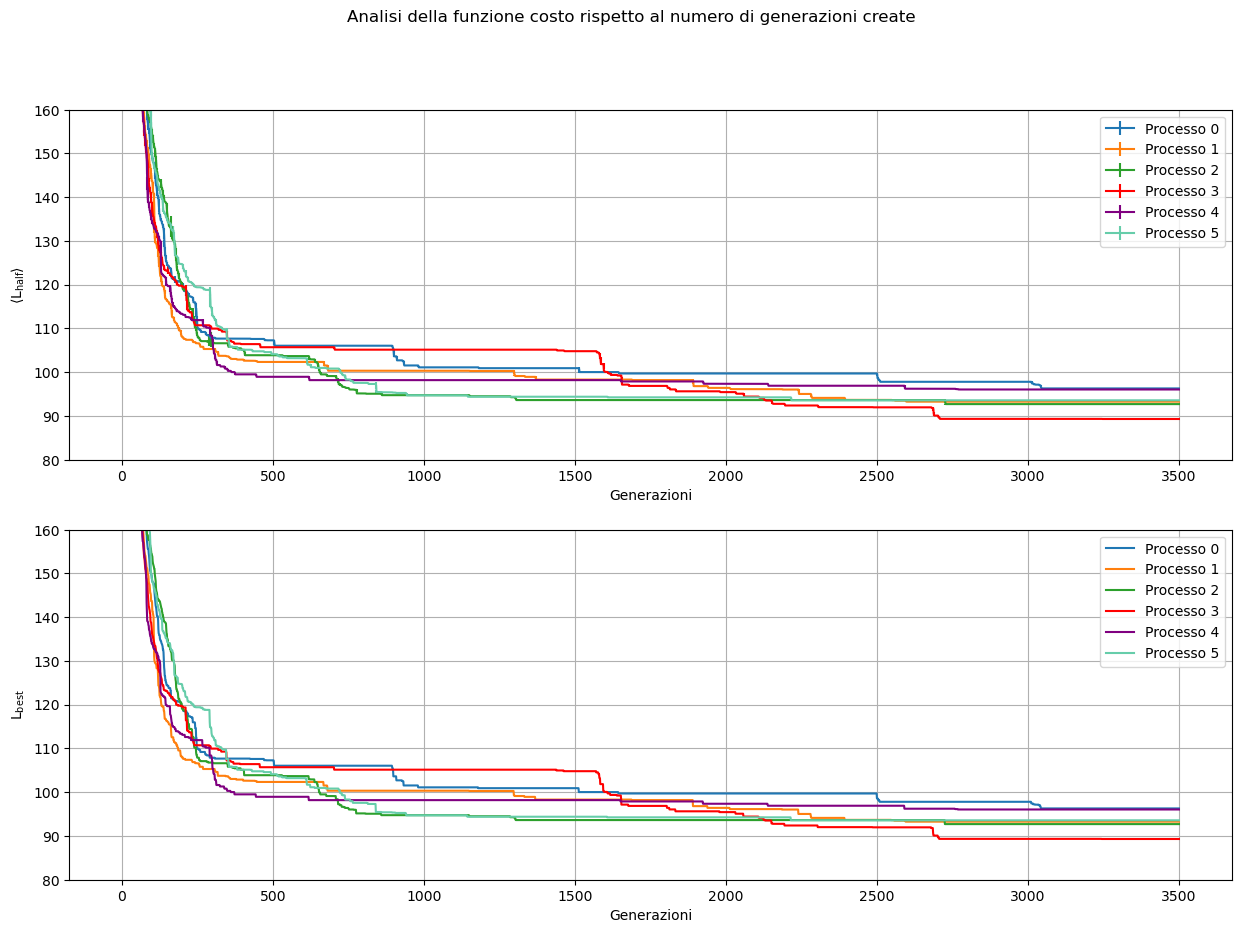

In [10]:
#costo del best path e media dei migliori individui con dev standard per ogni processo 

nc_0_bestL=np.loadtxt("NonComunicanti/bestloss_0.dat",  unpack="true")
nc_0_meanL, nc_0_errorsL=np.loadtxt("NonComunicanti/besthalfloss_0.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

nc_1_bestL=np.loadtxt("NonComunicanti/bestloss_1.dat",  unpack="true")
nc_1_meanL, nc_1_errorsL=np.loadtxt("NonComunicanti/besthalfloss_1.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

nc_2_bestL=np.loadtxt("NonComunicanti/bestloss_2.dat",  unpack="true")
nc_2_meanL, nc_2_errorsL=np.loadtxt("NonComunicanti/besthalfloss_2.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

nc_3_bestL=np.loadtxt("NonComunicanti/bestloss_3.dat",  unpack="true")
nc_3_meanL, nc_3_errorsL=np.loadtxt("NonComunicanti/besthalfloss_3.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

nc_4_bestL=np.loadtxt("NonComunicanti/bestloss_4.dat",  unpack="true")
nc_4_meanL, nc_4_errorsL=np.loadtxt("NonComunicanti/besthalfloss_4.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

nc_5_bestL=np.loadtxt("NonComunicanti/bestloss_5.dat",  unpack="true")
nc_5_meanL, nc_5_errorsL=np.loadtxt("NonComunicanti/besthalfloss_5.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

#plot
nclfig ,(nclplt1, nclplt2) = plt.subplots(2, 1, figsize=(15, 10))

nclplt1.errorbar(x, nc_0_meanL, yerr=nc_0_errorsL, label="Processo 0")
nclplt1.errorbar(x, nc_1_meanL, yerr=nc_1_errorsL, label="Processo 1")
nclplt1.errorbar(x, nc_2_meanL, yerr=nc_2_errorsL, label="Processo 2")
nclplt1.errorbar(x, nc_3_meanL, yerr=nc_3_errorsL, label="Processo 3", color='red')
nclplt1.errorbar(x, nc_4_meanL, yerr=nc_4_errorsL, label="Processo 4", color='purple')
nclplt1.errorbar(x, nc_5_meanL, yerr=nc_5_errorsL, label="Processo 5", color='mediumaquamarine')
nclplt1.set_xlabel("Generazioni")
nclplt1.set_ylabel(r"$\left<\mathrm{L_{half}}\right>$")
nclplt1.set_ylim(80,160)
nclplt1.legend()
nclplt1.grid(True)

nclplt2.plot(x, nc_0_bestL, label="Processo 0")
nclplt2.plot(x, nc_1_bestL, label="Processo 1")
nclplt2.plot(x, nc_2_bestL, label="Processo 2")
nclplt2.plot(x, nc_3_bestL, label="Processo 3", color='red')
nclplt2.plot(x, nc_4_bestL, label="Processo 4", color='purple')
nclplt2.plot(x, nc_5_bestL, label="Processo 5", color='mediumaquamarine')
nclplt2.set_xlabel("Generazioni")
nclplt2.set_ylabel(r"$\mathrm{L_{best}}$")
nclplt2.set_ylim(80,160)
nclplt2.legend()
nclplt2.grid(True)

nclfig.suptitle("Analisi della funzione costo rispetto al numero di generazioni create")
plt.show()

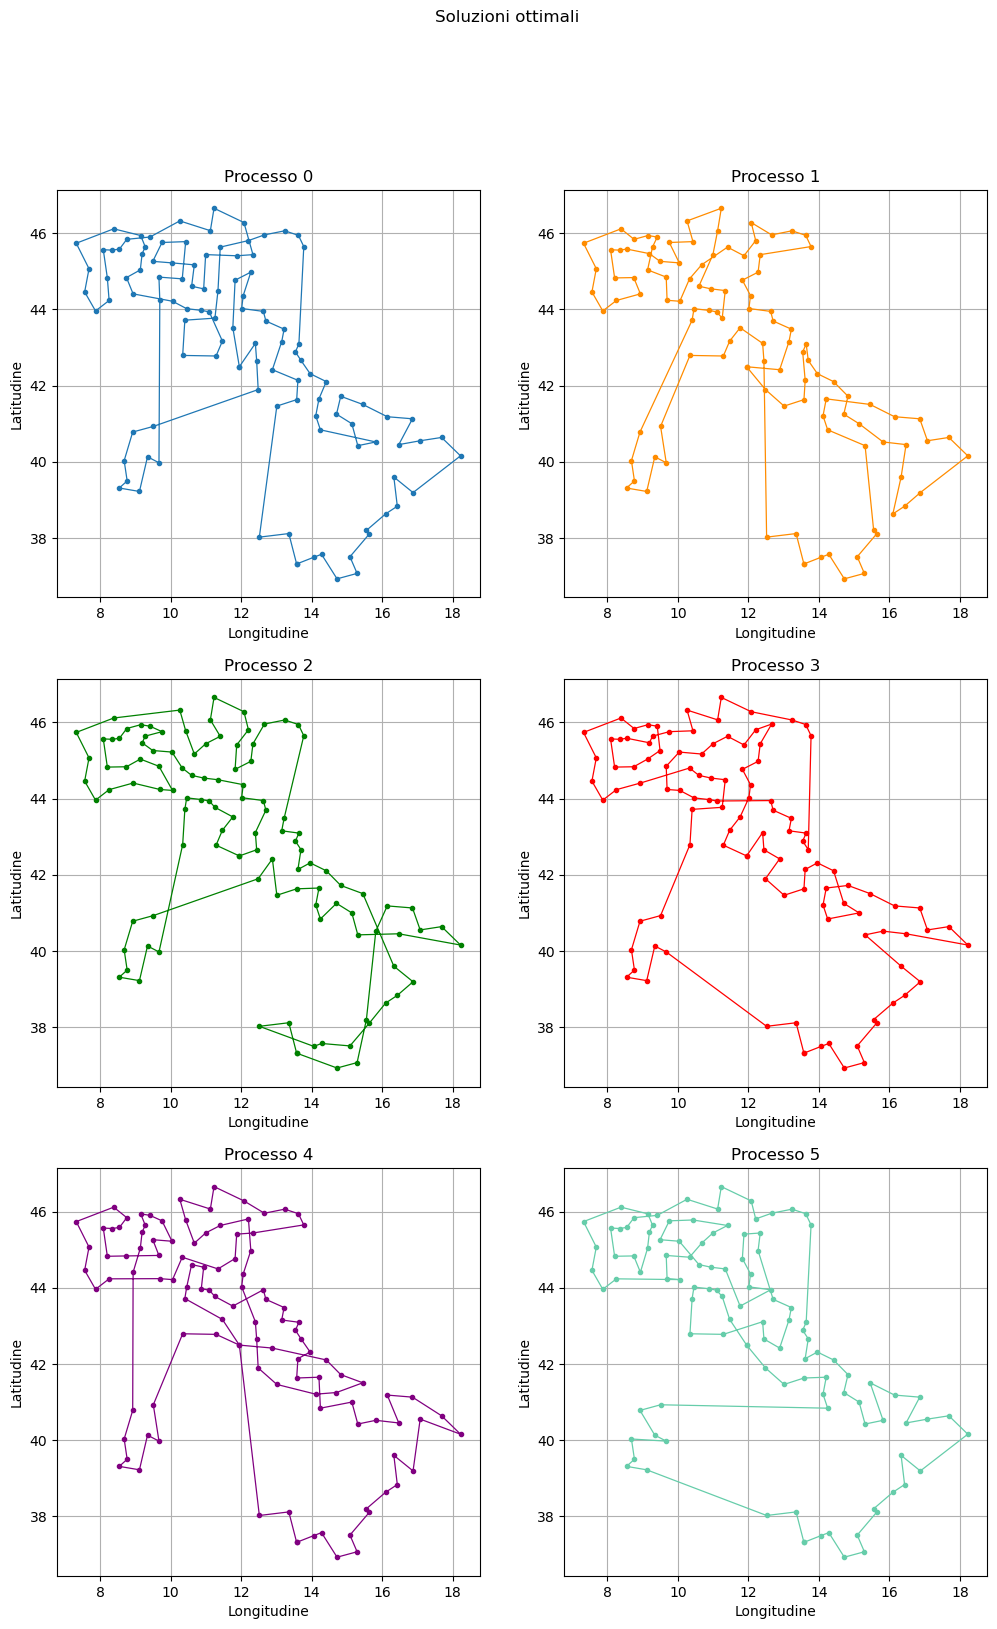

In [11]:
#coordinate percorso migliore in assoluto per ogni processo
nc_0_x, nc_0_y=np.loadtxt("NonComunicanti/bestpath_0.dat", usecols=(0, 1), unpack="true")
nc_1_x, nc_1_y=np.loadtxt("NonComunicanti/bestpath_1.dat", usecols=(0, 1), unpack="true")
nc_2_x, nc_2_y=np.loadtxt("NonComunicanti/bestpath_2.dat", usecols=(0, 1), unpack="true")
nc_3_x, nc_3_y=np.loadtxt("NonComunicanti/bestpath_3.dat", usecols=(0, 1), unpack="true")
nc_4_x, nc_4_y=np.loadtxt("NonComunicanti/bestpath_4.dat", usecols=(0, 1), unpack="true")
nc_5_x, nc_5_y=np.loadtxt("NonComunicanti/bestpath_5.dat", usecols=(0, 1), unpack="true")

#plot
ncpfig, ncpplt = plt.subplots(3, 2, figsize=(12, 18))

(ncpplt1, ncpplt2), (ncpplt3, ncpplt4), (ncpplt5, ncpplt6) = ncpplt

ncpplt1.plot(nc_0_x, nc_0_y, marker='.', linewidth=0.9)
ncpplt1.grid()
ncpplt1.set_title("Processo 0")
ncpplt1.set_xlabel("Longitudine")
ncpplt1.set_ylabel("Latitudine")

ncpplt2.plot(nc_1_x, nc_1_y, marker='.', linewidth=0.9, color='darkorange')
ncpplt2.grid()
ncpplt2.set_title("Processo 1")
ncpplt2.set_xlabel("Longitudine")
ncpplt2.set_ylabel("Latitudine")

ncpplt3.plot(nc_2_x, nc_2_y, marker='.', linewidth=0.9, color='green')
ncpplt3.grid()
ncpplt3.set_title("Processo 2")
ncpplt3.set_xlabel("Longitudine")
ncpplt3.set_ylabel("Latitudine")

ncpplt4.plot(nc_3_x, nc_3_y, marker='.', linewidth=0.9, color='red')
ncpplt4.grid()
ncpplt4.set_title("Processo 3")
ncpplt4.set_xlabel("Longitudine")
ncpplt4.set_ylabel("Latitudine")

ncpplt5.plot(nc_4_x, nc_4_y, marker='.', linewidth=0.9, color='purple')
ncpplt5.grid()
ncpplt5.set_title("Processo 4")
ncpplt5.set_xlabel("Longitudine")
ncpplt5.set_ylabel("Latitudine")

ncpplt6.plot(nc_5_x, nc_5_y, marker='.', linewidth=0.9, color='mediumaquamarine')
ncpplt6.grid()
ncpplt6.set_title("Processo 5")
ncpplt6.set_xlabel("Longitudine")
ncpplt6.set_ylabel("Latitudine")

ncpfig.suptitle("Soluzioni ottimali")
plt.show()

## Analisi con processi comunicanti

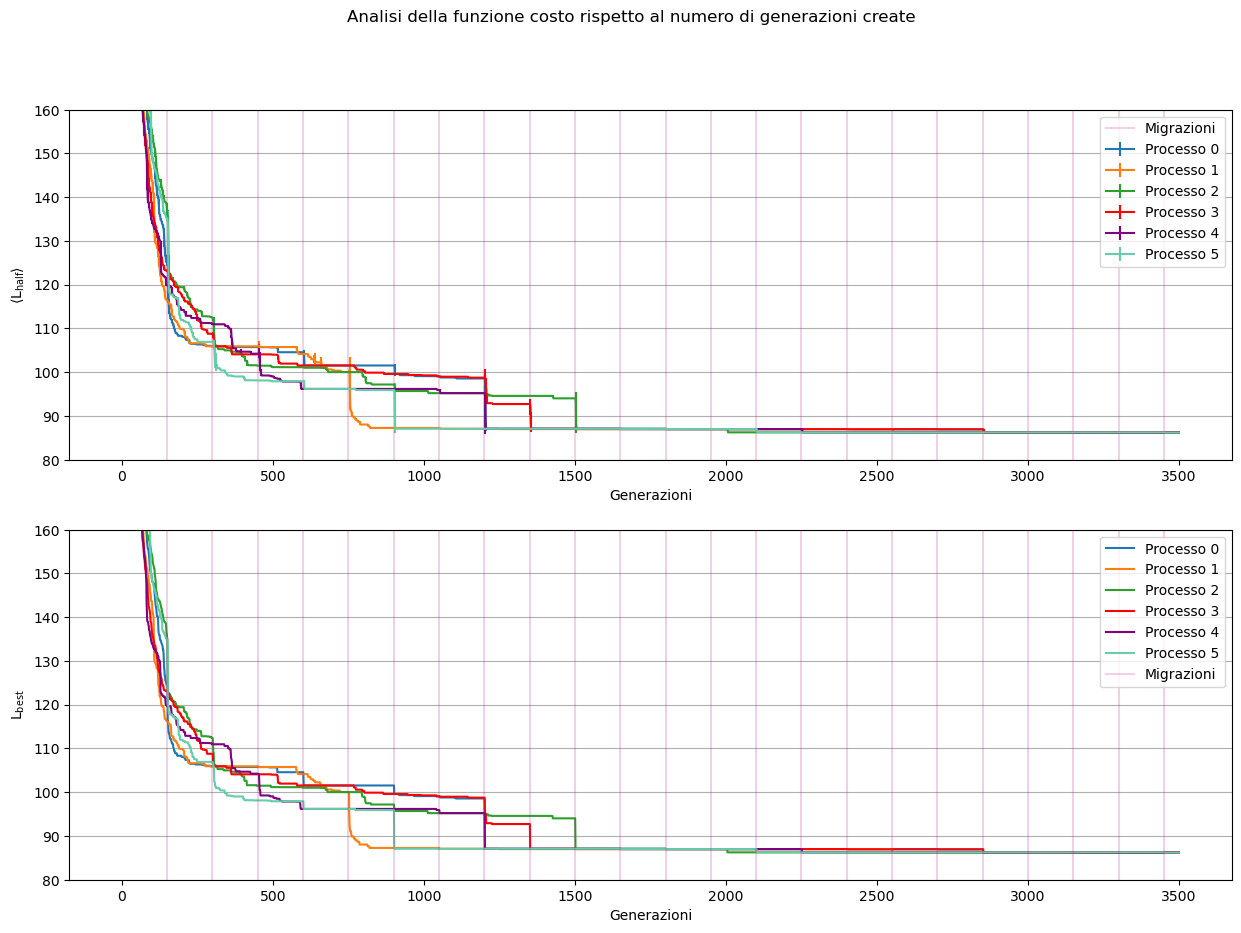

In [12]:
#costo del best path e media dei migliori individui con dev standard per ogni processo 

c_0_bestL=np.loadtxt("Comunicanti/bestloss_0.dat",  unpack="true")
c_0_meanL, c_0_errorsL=np.loadtxt("Comunicanti/besthalfloss_0.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

c_1_bestL=np.loadtxt("Comunicanti/bestloss_1.dat",  unpack="true")
c_1_meanL, c_1_errorsL=np.loadtxt("Comunicanti/besthalfloss_1.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

c_2_bestL=np.loadtxt("Comunicanti/bestloss_2.dat",  unpack="true")
c_2_meanL, c_2_errorsL=np.loadtxt("Comunicanti/besthalfloss_2.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

c_3_bestL=np.loadtxt("Comunicanti/bestloss_3.dat",  unpack="true")
c_3_meanL, c_3_errorsL=np.loadtxt("Comunicanti/besthalfloss_3.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

c_4_bestL=np.loadtxt("Comunicanti/bestloss_4.dat",  unpack="true")
c_4_meanL, c_4_errorsL=np.loadtxt("Comunicanti/besthalfloss_4.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

c_5_bestL=np.loadtxt("Comunicanti/bestloss_5.dat",  unpack="true")
c_5_meanL, c_5_errorsL=np.loadtxt("Comunicanti/besthalfloss_5.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

#plot
clfig ,(clplt1, clplt2) = plt.subplots(2, 1, figsize=(15, 10))

clplt1.errorbar(x, c_0_meanL, yerr=c_0_errorsL, label="Processo 0")
clplt1.errorbar(x, c_1_meanL, yerr=c_1_errorsL, label="Processo 1")
clplt1.errorbar(x, c_2_meanL, yerr=c_2_errorsL, label="Processo 2")
clplt1.errorbar(x, c_3_meanL, yerr=c_3_errorsL, label="Processo 3", color='red')
clplt1.errorbar(x, c_4_meanL, yerr=c_4_errorsL, label="Processo 4", color='purple')
clplt1.errorbar(x, c_5_meanL, yerr=c_5_errorsL, label="Processo 5", color='mediumaquamarine')
for i in swap_x :
    if i==swap_x[0]:
        clplt1.axvline(x=i, color='mediumvioletred', label="Migrazioni", alpha=0.2)
    else:
        clplt1.axvline(x=i, color='mediumvioletred', alpha=0.2)
clplt1.set_xlabel("Generazioni")
clplt1.set_ylabel(r"$\left<\mathrm{L_{half}}\right>$")
clplt1.set_ylim(80, 160)
clplt1.legend()
clplt1.grid(axis='y')

clplt2.plot(x, c_0_bestL, label="Processo 0")
clplt2.plot(x, c_1_bestL, label="Processo 1")
clplt2.plot(x, c_2_bestL, label="Processo 2")
clplt2.plot(x, c_3_bestL, label="Processo 3", color='red')
clplt2.plot(x, c_4_bestL, label="Processo 4", color='purple')
clplt2.plot(x, c_5_bestL, label="Processo 5", color='mediumaquamarine')
for i in swap_x :
    if i==swap_x[0]:
        clplt2.axvline(x=i, color='mediumvioletred', label="Migrazioni", alpha=0.2)
    else:
        clplt2.axvline(x=i, color='mediumvioletred', alpha=0.2)
clplt2.set_xlabel("Generazioni")
clplt2.set_ylabel(r"$\mathrm{L_{best}}$")
clplt2.set_ylim(80, 160)
clplt2.legend()
clplt2.grid(axis='y')

clfig.suptitle("Analisi della funzione costo rispetto al numero di generazioni create")
plt.show()

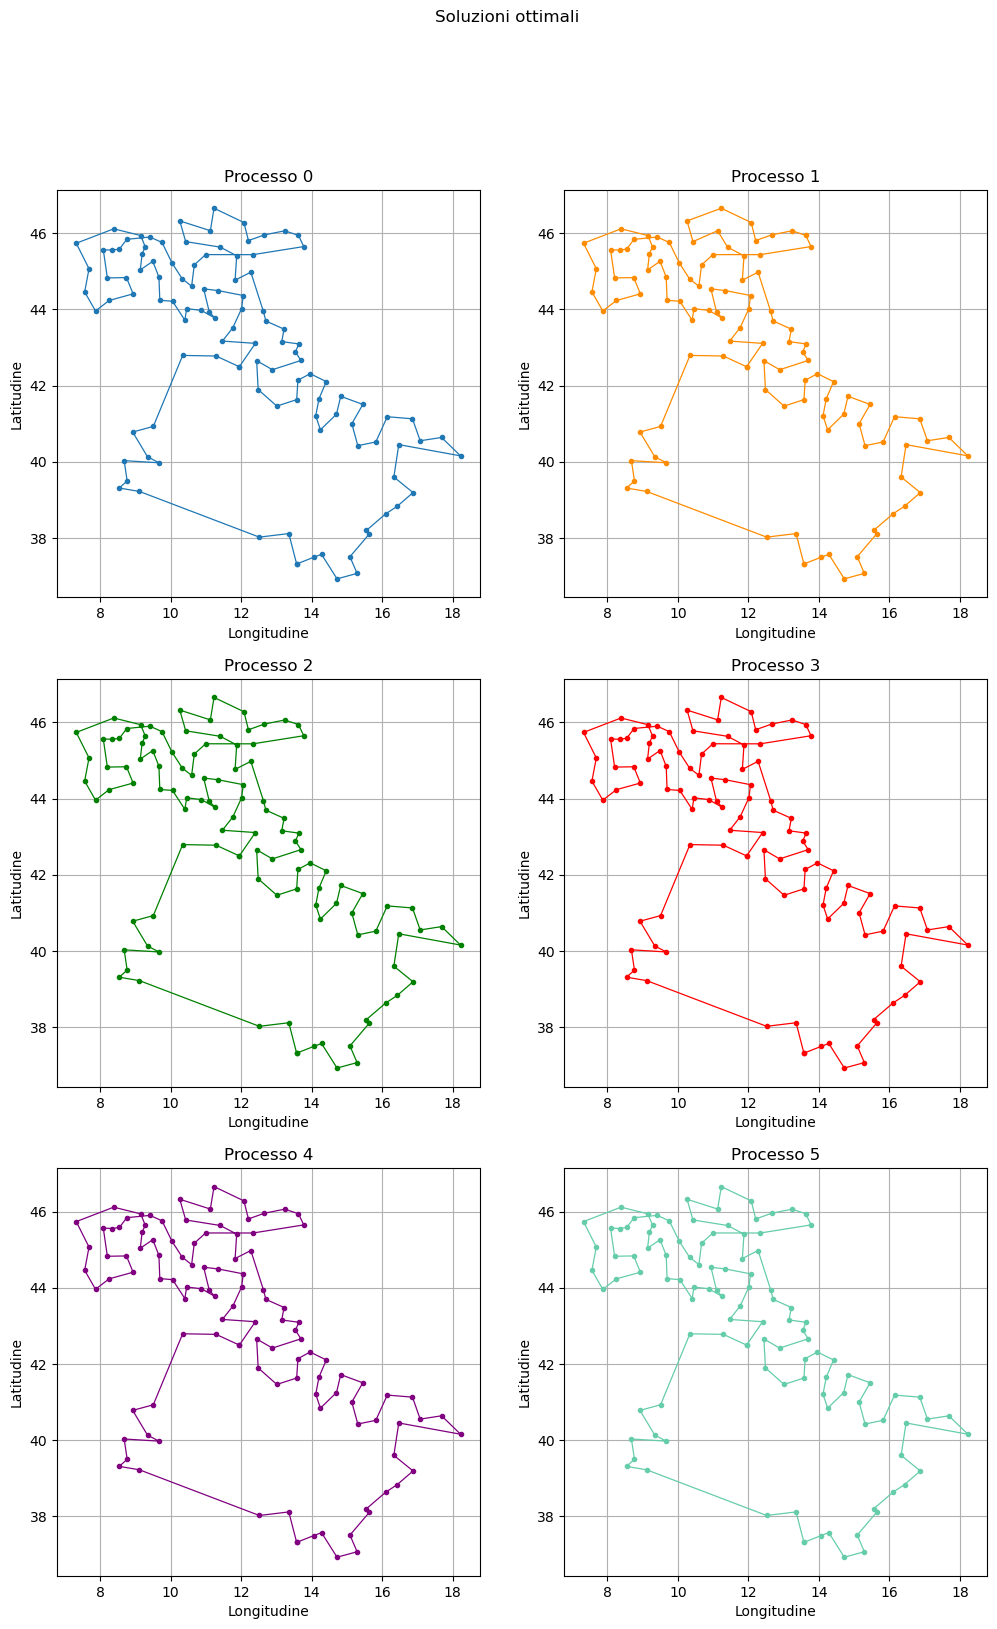

In [13]:
#coordinate percorso migliore in assoluto per ogni processo 
c_0_x, c_0_y=np.loadtxt("Comunicanti/bestpath_0.dat", usecols=(0, 1), unpack="true")
c_1_x, c_1_y=np.loadtxt("Comunicanti/bestpath_1.dat", usecols=(0, 1), unpack="true")
c_2_x, c_2_y=np.loadtxt("Comunicanti/bestpath_2.dat", usecols=(0, 1), unpack="true")
c_3_x, c_3_y=np.loadtxt("Comunicanti/bestpath_3.dat", usecols=(0, 1), unpack="true")
c_4_x, c_4_y=np.loadtxt("Comunicanti/bestpath_4.dat", usecols=(0, 1), unpack="true")
c_5_x, c_5_y=np.loadtxt("Comunicanti/bestpath_5.dat", usecols=(0, 1), unpack="true")

#plot
cpfig, cpplt = plt.subplots(3, 2, figsize=(12, 18))

(cpplt1, cpplt2), (cpplt3, cpplt4), (cpplt5, cpplt6) = cpplt

cpplt1.plot(c_0_x, c_0_y, marker='.', linewidth=0.9)
cpplt1.grid()
cpplt1.set_title("Processo 0")
cpplt1.set_xlabel("Longitudine")
cpplt1.set_ylabel("Latitudine")

cpplt2.plot(c_1_x, c_1_y, marker='.', linewidth=0.9, color='darkorange')
cpplt2.grid()
cpplt2.set_title("Processo 1")
cpplt2.set_xlabel("Longitudine")
cpplt2.set_ylabel("Latitudine")

cpplt3.plot(c_2_x, c_2_y, marker='.', linewidth=0.9, color='green')
cpplt3.grid()
cpplt3.set_title("Processo 2")
cpplt3.set_xlabel("Longitudine")
cpplt3.set_ylabel("Latitudine")

cpplt4.plot(c_3_x, c_3_y, marker='.', linewidth=0.9, color='red')
cpplt4.grid()
cpplt4.set_title("Processo 3")
cpplt4.set_xlabel("Longitudine")
cpplt4.set_ylabel("Latitudine")

cpplt5.plot(c_4_x, c_4_y, marker='.', linewidth=0.9, color='purple')
cpplt5.grid()
cpplt5.set_title("Processo 4")
cpplt5.set_xlabel("Longitudine")
cpplt5.set_ylabel("Latitudine")

cpplt6.plot(c_5_x, c_5_y, marker='.', linewidth=0.9, color='mediumaquamarine')
cpplt6.grid()
cpplt6.set_title("Processo 5")
cpplt6.set_xlabel("Longitudine")
cpplt6.set_ylabel("Latitudine")

cpfig.suptitle("Soluzioni ottimali")
plt.show()

## Confronto

Ad occhio è evidente che nessuna delle soluzioni ottimali proposte corrisponda ad un minimo globale della funzione costo, tuttavia con il codice e le risorse computazionali a disposizione quanto fatto risulta non migliorabile. Per ottenere percorsi migliori si potrebbe procedere aumentando i core a disposizione e modificando gli operatori del GA. In ogni caso far comunicare i core durante la parallelizzazione risulta una scelta vincente: non solo tutti i processi convergono più velocemente al minimo costo che hanno trovato, ma anche i percorsi ottimali proposti sono visibilmente migliori. 

In [14]:
print("Costo soluzione ottimale processi non comunicanti:")
print("Processo 0 = ", nc_0_bestL.min())
print("Processo 1 = ", nc_1_bestL.min())
print("Processo 2 = ", nc_2_bestL.min())
print("Processo 3 = ", nc_3_bestL.min())
print("Processo 4 = ", nc_4_bestL.min())
print("Processo 5 = ", nc_5_bestL.min())
print("Costo soluzione ottimale processi comunicanti:")
print("Processo 0 = ", c_0_bestL.min())
print("Processo 1 = ", c_1_bestL.min())
print("Processo 2 = ", c_2_bestL.min())
print("Processo 3 = ", c_3_bestL.min())
print("Processo 4 = ", c_4_bestL.min())
print("Processo 5 = ", c_5_bestL.min())

Costo soluzione ottimale processi non comunicanti:
Processo 0 =  96.29738
Processo 1 =  93.27402
Processo 2 =  92.71325
Processo 3 =  89.30874
Processo 4 =  96.05533
Processo 5 =  93.57756
Costo soluzione ottimale processi comunicanti:
Processo 0 =  86.19811
Processo 1 =  86.25791
Processo 2 =  86.19811
Processo 3 =  86.19811
Processo 4 =  86.19811
Processo 5 =  86.19811
